### **IRIS Flower prediction based on the Sepal length, Sepal width, patel length and patel width**

### Decision tree

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

Using this algorithm, we are going to predict the flower species.

### How decision trees work
Decision trees work in a step-wise manner, meaning that they perform a step-by-step process instead of following a continuous process. Decision trees follow a tree-like structure, where the nodes of a tree are split using the features based on defined criteria. The main criteria based on which decision trees split are:

**Gini impurity:** Measures the impurity in a node.

**Entropy:** Measures the randomness of the system.

**Variance:** This is normally used in the Regression model, which is a measure of the variation of each data point from the mean.

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Loading the dataset

In [3]:
df = load_iris()
df = sns.load_dataset('iris')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Dataset shape

In [6]:
df.shape

(150, 5)

### Descriptive statistics of the dataset

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visulaizing the dataset to identify the pattern

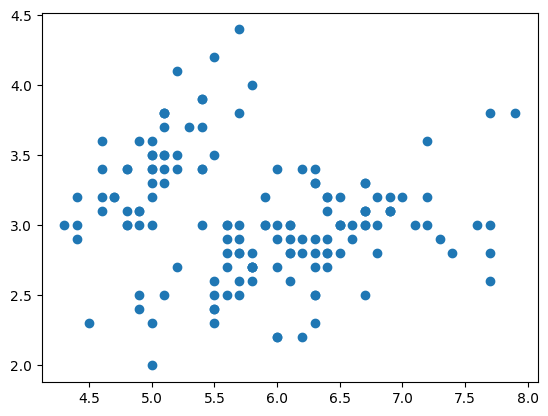

In [8]:
plt.scatter(df["sepal_length"],df["sepal_width"])
plt.show()

### Checking the relationsip between features with each other using pairplot

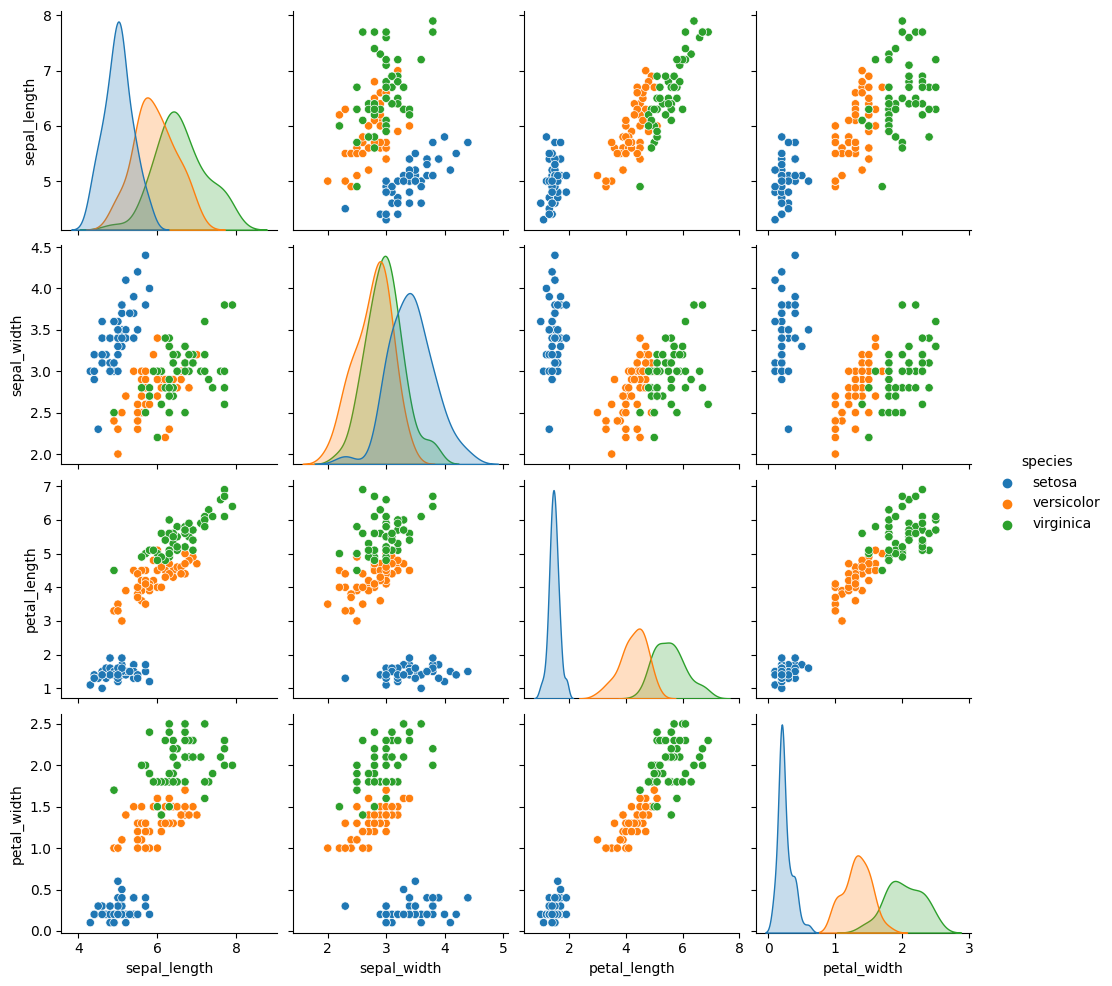

In [9]:
sns.pairplot((df), hue='species')
plt.show()

### Counting the number of specific species for the prediction

In [10]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Selecting the features to build the decision tree model

In [11]:
X = df.iloc[:, :-2]
y = df['species']

### Spliting the data, Training and testing the data for the decision tree model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

### Visulaizing the decision tree and classification report of our decision tree model and checking the model accuracy score:

In [16]:
ypred = treemodel.predict(X_test)
score = accuracy_score(ypred, y_test)
print("Accuracy score of our decision tree model is: ",score*100,"%.")
print("---------Classification report of our model----------")
print(classification_report(ypred, y_test))

Accuracy score of our decision tree model is:  95.0 %.
---------Classification report of our model----------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       1.00      0.86      0.93        22
   virginica       0.83      1.00      0.91        15

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



[Text(0.4444444444444444, 0.9545454545454546, 'x[2] <= 2.45\ngini = 0.665\nsamples = 90\nvalue = [27, 31, 32]'),
 Text(0.3333333333333333, 0.8636363636363636, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.5555555555555556, 0.8636363636363636, 'x[2] <= 4.75\ngini = 0.5\nsamples = 63\nvalue = [0, 31, 32]'),
 Text(0.3333333333333333, 0.7727272727272727, 'x[0] <= 4.95\ngini = 0.071\nsamples = 27\nvalue = [0, 26, 1]'),
 Text(0.2222222222222222, 0.6818181818181818, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.6818181818181818, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(0.7777777777777778, 0.7727272727272727, 'x[2] <= 5.15\ngini = 0.239\nsamples = 36\nvalue = [0, 5, 31]'),
 Text(0.6666666666666666, 0.6818181818181818, 'x[0] <= 6.5\ngini = 0.459

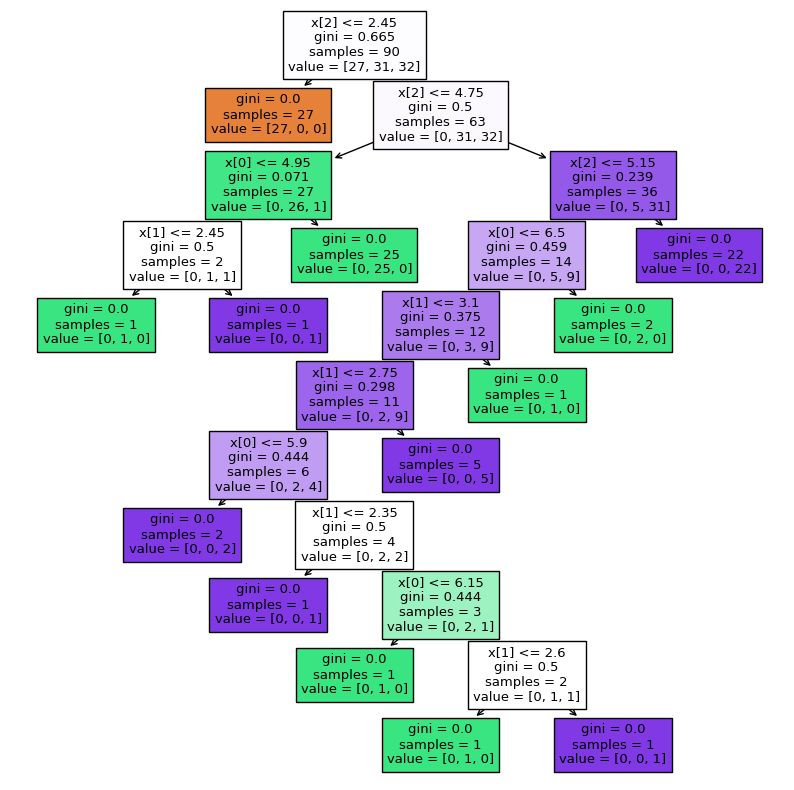

In [17]:
plt.figure(figsize=(10, 10))
tree.plot_tree(treemodel, filled=True)